# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 


## Importing necessary libraries

In [1]:
#for making the Python code more structured automatically (good coding practice)
%load_ext nb_black

#to help with reading and manipulating data
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#for splitting the data into train and test
from sklearn.model_selection import train_test_split

#for building linear regression_model
from sklearn.linear_model import LinearRegression

#for checking model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#for building linear regression_model using statsmodels
import statsmodels.api as sm

#to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
#loading the csv file
df=pd.read_csv('used_device_data.csv')
#Checking the first few lines of our data set
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
#getting an overview of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

### Observations:

1. There are 9 float columns, 4 object/string columns and 2 integer columns in this data set.
2. Brand name, os, 4g and 5g are categorical while the others are numerical
3. some of the columns have missing values

In [4]:
#Checking the shape of the data
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

The data set has 3454 rows and 15 columns

In [5]:
#checking the statistical details of the data set
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

### Observations

1. There are 34 unique brands
2. Android OS is the most popular OS
3. The largest Main camera has 48mega pixels and the smallest main camera has 0.08 mp
4. The largest selfie camera has 32 mega pixelsFor example, the highest normalized used price us 7.848.
5. The mean new price is 5.233 and the mean used price is 4.36
6. The average for most of the numerical data is larger than the median which may mean we have skewed data

In [6]:
#Checking for duplicates in the data set
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

Observation: There are no duplicates in the data set.

In [7]:
#Checking for null values in the data set
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
#Creating a copy of the data set to prevent tampering with the original
df1=df.copy()
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

Observation: There are 202 null values in the data set which we will be treating soon. the main_camera_mp column has the highest number of null values.

## Exploratory Data Analysis (EDA)

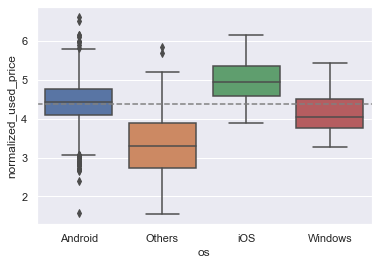

<IPython.core.display.Javascript object>

In [9]:
#creating a box plot of normalized used price and OS to observe the relationship
sns.boxplot(data= df1, x='os',y= 'normalized_used_price')
plt.axhline(df1['normalized_used_price'].mean(), color="gray", linestyle="--")
plt.show()

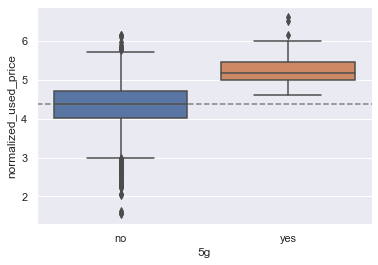

<IPython.core.display.Javascript object>

In [10]:
#creating a box plot of normalized used price and 5g
sns.boxplot(data= df1, x='5g',y= 'normalized_used_price')
plt.axhline(df1['normalized_used_price'].mean(), color="gray", linestyle="--")
plt.show()

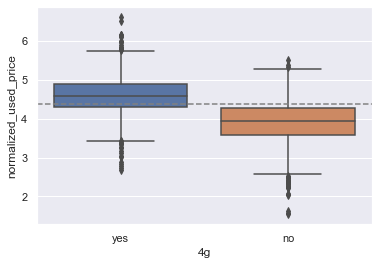

<IPython.core.display.Javascript object>

In [11]:
#creating a box plot of normalized used price and 4g
sns.boxplot(data= df1, x='4g',y= 'normalized_used_price')
plt.axhline(df1['normalized_used_price'].mean(), color="gray", linestyle="--")
plt.show()

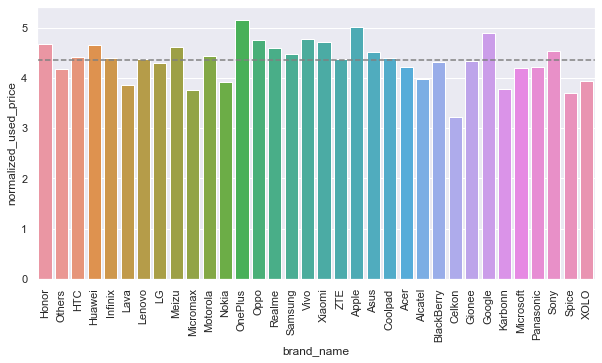

<IPython.core.display.Javascript object>

In [12]:
#creating a barplot of normalized used price and brand_name
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data= df, x='brand_name',y= 'normalized_used_price',ci=False)
plt.axhline(df1['normalized_used_price'].mean(), color="gray", linestyle="--")
plt.show()

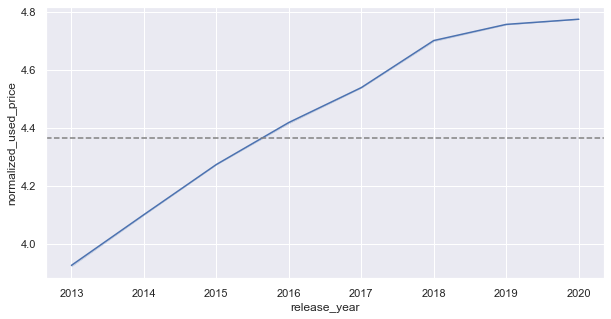

<IPython.core.display.Javascript object>

In [13]:
#creating a lineplot of normalized used price and release_year
plt.figure(figsize=(10,5))
sns.lineplot(data= df, x='release_year',y= 'normalized_used_price',ci=False)
plt.axhline(df1['normalized_used_price'].mean(), color="gray", linestyle="--")
plt.show()

### Observations from EDA:

1. Ios has the highest normalized_used price, followed by the android os.
2. Normalized used price for phones with 5g is more than those without. phones without 5g cost below average. All phones and tablets that have 5g cost more than average.
3. Normalized used price for phones with 4g is also more than those without. phones with 4g cost slightly above average while  75% of the devices without 4g cost below the average normalized used price.
4. The normalized used price of oneplus phones and tablets is the highest, followed by apple. On average, about 14 brand names have normalized used price above the average.
5. From the line plot, we can see that as the year increases, the normalized use price increases. telling us that more recent devices has a higher used price.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

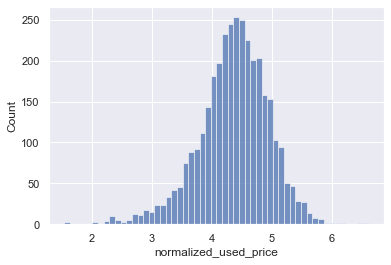

<IPython.core.display.Javascript object>

In [14]:
#plotting a histogram to show the distribution of normalized used prices
sns.histplot(df1.normalized_used_price);

### Observation:

1. From the histplot for normalized used prices for devices, we can observe a normal distribution though slightly left skewed.

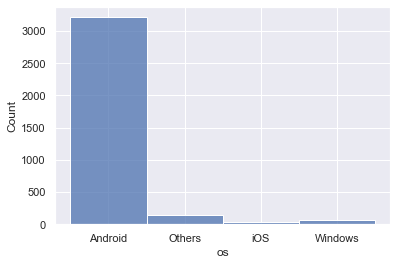

<IPython.core.display.Javascript object>

In [15]:
#creating a histplot showing the OS distribution
sns.histplot(df1.os);

In [16]:
#Finding the percentage of phones and tablets that have android OS
df1.os.value_counts('Android')

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

<IPython.core.display.Javascript object>

### Observation:
approximately 93.1% of the phones and tablets use android OS

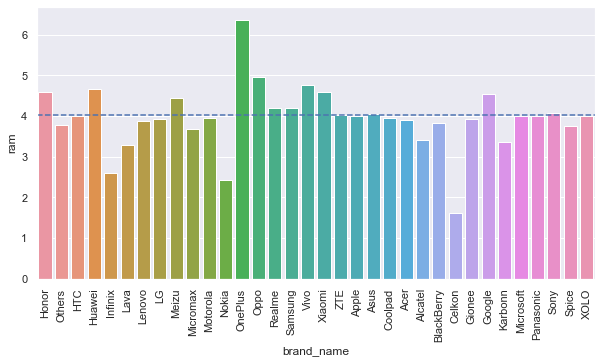

<IPython.core.display.Javascript object>

In [17]:
#Checking how the amount of Ram varies with each brand by plotting a bar grph
plt.figure(figsize=(10, 5))
sns.barplot(y=df1.ram, x=df1.brand_name, ci=False);
plt.xticks(rotation=90)
plt.axhline(df1['ram'].mean(), linestyle='dashed')
plt.show();

#### Observations:
The brand with the highest ram is Oneplus, and the brand with the lowest ram is Celkon. The brand names with ram above average are Honor, Huawei,Meizu,Oneplus, Oppo,Realme,Samsung,Vivo,Xiaomi and google. Sony has an average Ram.

In [18]:
#Checking all devices with battery larger than 4500
df1[df1.battery > 4500]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


<IPython.core.display.Javascript object>

#### Observations:
There are 341 devices with batteries above 4500. I will make them a new data set and plot a bar plot with them

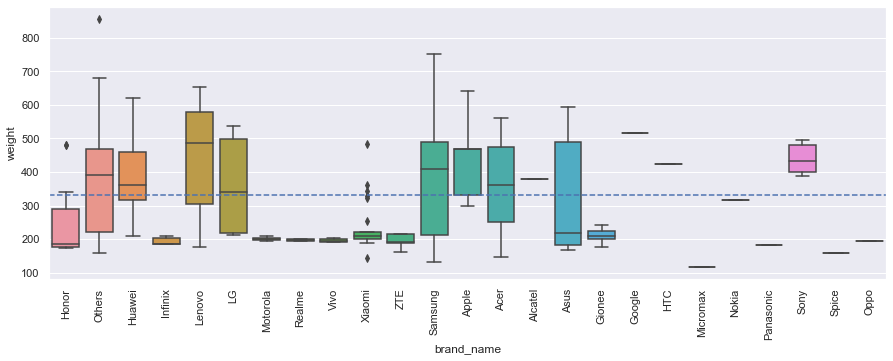

<IPython.core.display.Javascript object>

In [19]:
#Creating data frame for batteries above 4500
batt_above_4500= df1[df1.battery > 4500]#creating boxplot for the large battery data frame
plt.figure(figsize=(1, 5))
sns.boxplot(data= batt_above_4500, x= 'brand_name',y= 'weight')
plt.axhline(batt_above_4500.weight.mean(), linestyle='dashed')
plt.xticks(rotation=90)
plt.show();

### Observations:
1. The google devices that have batteries larger than 4500 weigh the most. 
2. the Micromax brand hasthe least weight for devices with batteries larger than 4500. 
3. about 11 brands with devices having battery of more than 4500 weigh above the average weight

In [20]:
#since the size of the screen given in the data set is actually in cm and not inches,i need to do a conversion
#since 6 inches = 15.24cm, i will be using 15.24 in the calculation
df1[df1.screen_size>15.24]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829


<IPython.core.display.Javascript object>

Observation: There are 1099 Phones and tablets that have screen size greater than 6". I'll plot them on a graph to visualize them.

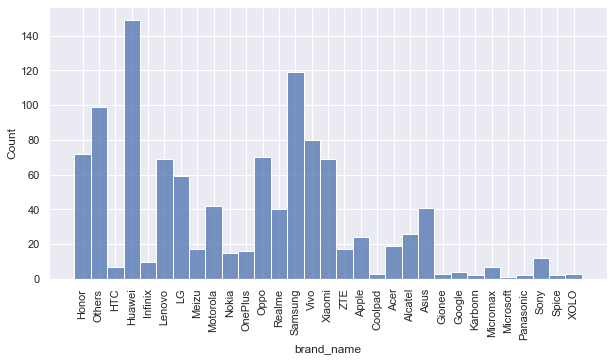

<IPython.core.display.Javascript object>

In [21]:
#data frame for screen above 6 inches:
screen_above_6=df1[df1.screen_size>15.24]
#plotting a hist plot for new data frame
plt.figure(figsize=(10, 5))
sns.histplot(screen_above_6.brand_name,)
plt.xticks(rotation=90)
plt.show()

### Observations: 
Huawei has the highest numer of phones and tablets with screen above 6 inches. samsung,vivo, others amd Honor have quite some options with screens above 6 inches as well. is Huawei. brands like karbonn, Microsoft, coolpad, google and gionee have only a few phones and tablets that have larger screens than 6"

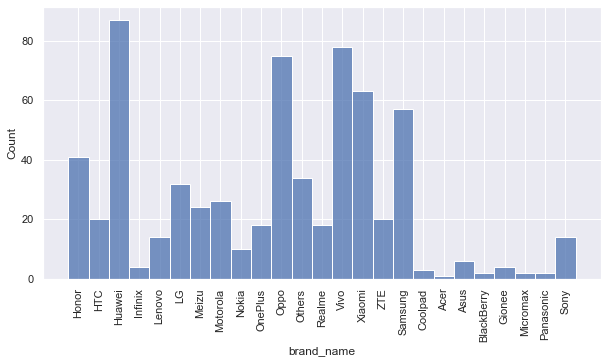

<IPython.core.display.Javascript object>

In [22]:
#Getting devices with selfie camera above 8
#I will plot this in a graph without necessarily creating a new data frame by making the x axis pass only the brand_names with selfie camera larger than 8 in the plot.
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x=df1[df1.selfie_camera_mp>8.0].brand_name);
plt.xticks(rotation=90)
plt.show()

### Observation:
Customers who enjoy taking  selfies would prefer to choose from brand names like Huawei,Vivo, Oppo and Xiaomi. there are very few options for phones and tablets with front camera larger tha from Infinix, Acer, Blackberry, Micromax and Panasonic,

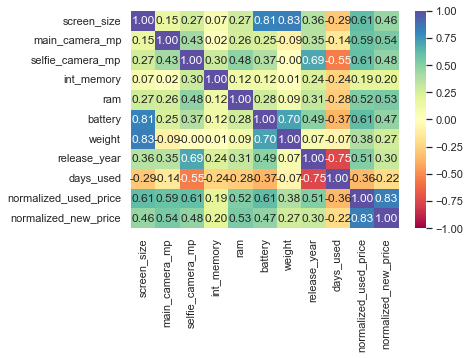

<IPython.core.display.Javascript object>

In [23]:
#Checking the correlation between all numerical variables
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:
1. The variable that has the strongest positive correlation with the normalized used price is the normalized new price.

2. We can also observe positive correlationg between normalized used price and release year, battery, ram,selfie camera mp, main camera mp and screen size.

3. We can also observe weak positive correlations bewtween the normalized used price and the internal memory, and weight.

4. we may not pay much attention to the release year because it's value keeps varying.

5. When we look closely, we will also observe some strong correlations between some columns:

6. Battery and weight has a strong correlation with screen size and even the weight and battery are correlated.

7. we can also see correlations between the selfie camera and release year, which also makes sense of the negative correlation between days used and selfie camera.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value treatment

In [24]:
#creating a copy of the dataframe
df2=df1.copy()

<IPython.core.display.Javascript object>

In [25]:
#Checking for null values
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

### Observations:
There are 202 null values. There are many outliers in the data set, hence using the mean will definitely lead to some bias. I will be using the median to fill the null values for the columns based on the outliers observation from the box plots, i will group by release year and brandname and get the median of the 2 columns together to fill each of the missing values.

In [26]:
#Filling null values for main camera column
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(
    value=df2.groupby(["brand_name"])["main_camera_mp"].transform("median")
)
#Rechecking the null values
df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          2
int_memory                4
ram                       4
battery                   6
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

Observation: There are still some unfilled values from the main camera column, so i will fill them with the median of the main camera column only.

In [27]:
#filling the null values for main camera column
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(df2["main_camera_mp"].median())
#rechecking the null values
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
#Filling null value for selfie camera
df2["selfie_camera_mp"] = df2["selfie_camera_mp"].fillna(
    value=df2.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)
#rechecking the null values
df2.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
#Filling null values for int memory column
df2["int_memory"] = df2["int_memory"].fillna(
    value=df2.groupby(["release_year","brand_name"])["int_memory"].transform("median")
)
#rechecking the null values
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [30]:
#filling missing values for ram column with median
df2["ram"] = df2["ram"].fillna(
    value=df2.groupby(["release_year","brand_name"])["ram"].transform("median")
)
#Rechecking the null values
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [31]:
#filling null values for battery
df2["battery"] = df2["battery"].fillna(
#rechecking the null values
    value=df2.groupby(["brand_name"])["battery"].transform("median")
)
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [32]:
#filling null values for weight
df2["weight"] = df2["weight"].fillna(
    value=df2.groupby(["brand_name"])["weight"].transform("median")
)
#rechecking the null values
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

Observations: All null values have now been filled.

### Feature Engineering

In [33]:
#I'm creating a new column that represents the number of years that have passed since the phones and tablets where released to replace release_year because the column 'releas_year' will vary from time to time. 
#The years to date column is more permanent and stable than the release_year column
df2["years_to_date"] = 2022 - df2["release_year"]
df2.drop("release_year", axis=1, inplace=True)
df2["years_to_date"].describe()

count    3454.000000
mean        6.034742
std         2.298455
min         2.000000
25%         4.000000
50%         6.500000
75%         8.000000
max         9.000000
Name: years_to_date, dtype: float64

<IPython.core.display.Javascript object>

In [34]:
#Checking out the data frame again
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_to_date
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


<IPython.core.display.Javascript object>

Observation: The years to date column has now been added.

### Outlier Detection and treatment

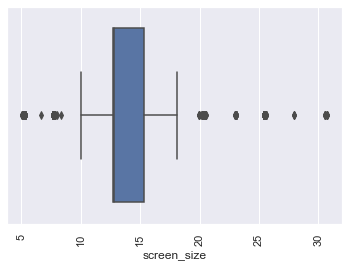

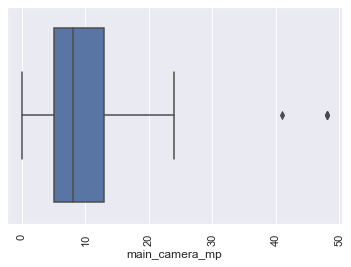

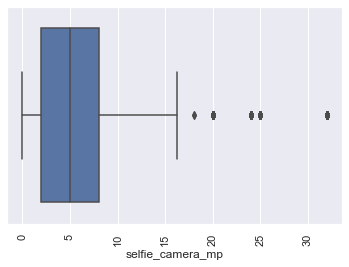

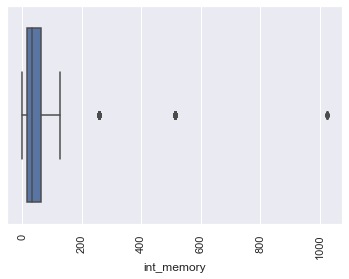

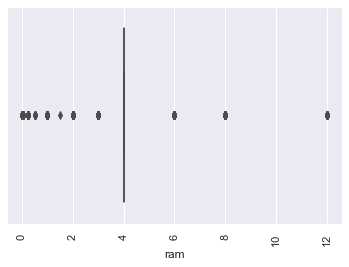

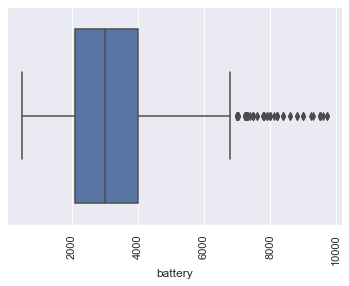

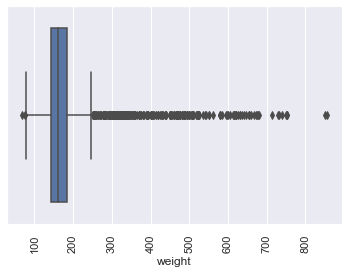

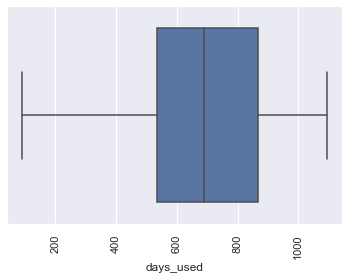

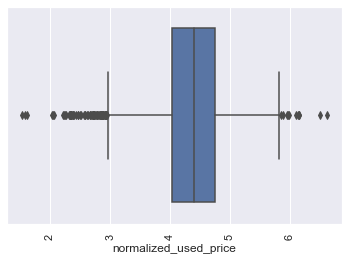

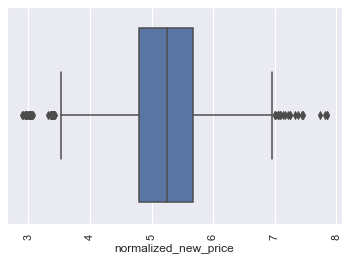

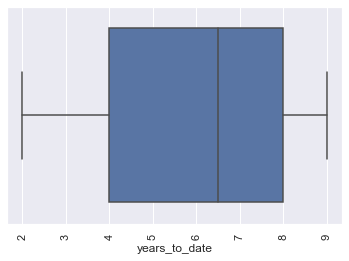

<IPython.core.display.Javascript object>

In [35]:
#Checking for outliers in the data set by plotting a box plot for all numerical variables
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
for i, variable in enumerate (num_cols):
    plt.xticks(rotation=90)
    sns.boxplot(data=df2,x=variable)
    plt.show()

### Observations
1. Screen size and Ram have upper and lower outliers
2. Normalized new price and normalized used price have both upper and lower outliers
3. weight has a lot of lower outliers
4. main camera mp, selfie camera mp, int memory, battery and weight all have lower outliers
5. There are no outliers in years to date and the days_used column.


#### I will not be treating the outliers as they seem to be valuable in the model prediction.
Since we are dealing with devices which include phones AND tablets, the outliers seem true. eg, tablets have relatively larger screen sizes than phones and tend to weigh much more.
I will consider this in building my model, and would pay attention to the RMSE since the MAE may not consider outliers in the calculation

## Preparing the data for modeling

In [36]:
#defining the dependent and independent variables
#I am dropping this column because it's the column for which we are checking dependency
#independent variable

x = df2.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df2[["normalized_used_price"]]

print(x.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_to_date  
0              4.715100              2  
1              5.519018              2  
2              5.884631              2  
3              5.630961              2  
4

<IPython.core.display.Javascript object>

In [37]:
#adding the intercept to data
x = sm.add_constant(x)

/Users/seyif/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [38]:
#getting dummy variables
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [39]:
# i will now split the data in the 70:30 ratio for train to test data respectively

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [40]:
#Checking the first few rows of the training data
x_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,...,0,0,1,0,0,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,...,0,0,0,0,0,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,...,0,0,0,0,0,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,...,0,0,1,0,0,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [41]:
#checking the first few rows of the testing data
x_test.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.0,15.24,8.00,2.0,16.0,4.00,3000.0,206.0,632,5.190788,...,0,0,0,0,0,0,0,0,0,0
957,1.0,10.16,3.15,0.3,512.0,0.25,1400.0,140.0,637,3.884652,...,0,0,0,0,0,0,0,0,0,0
280,1.0,15.39,8.00,8.0,32.0,2.00,5000.0,185.0,329,4.487287,...,0,0,0,0,0,0,0,0,1,0
2150,1.0,12.83,13.00,16.0,64.0,4.00,3200.0,148.0,648,5.639422,...,0,0,0,0,0,0,0,0,1,0
93,1.0,15.29,13.00,5.0,32.0,3.00,3500.0,179.0,216,5.300415,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [42]:
#printing the number of rows and columns in both train and test data
print("Number of rows in train data =", x_train.shape[0], "and the number of columns in train data =", x_train.shape[1])
print("Number of rows in test data =", x_test.shape[0], "and the number of columns in test data =", x_test.shape[1])

Number of rows in train data = 2417 and the number of columns in train data = 49
Number of rows in test data = 1037 and the number of columns in test data = 49


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [43]:
#Building the model and getting the summary of the regression results
olsmodel1 = sm.OLS(y_train,x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:26:02   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [44]:
#printing the rsquared
print("The coefficient of determination (R-squared) is ", olsmodel1.rsquared)


The coefficient of determination (R-squared) is  0.8448860078512486


<IPython.core.display.Javascript object>

### Observations Interpreting the Regression results

Adjusted. R-squared:, the value for adj. R-squared is 0.845, which is good.

The R-squared value tells us that our model can explain 84.5% of the variance in the training set.

If all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient which in this case is 1.3393
Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
In our case, the coefficient of selfie_camera_mp is 0.0135.

## Model Performance Check

In [45]:
#We can check the model performance by checking the rsquared, adjusted r squared, RMSE, MAE and MAPE 
#function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    #computing r2,adjr2,rmse,mae and mape
    r2 = r2_score(target, pred)  
    adjr2 = adj_r2_score(predictors, target, pred)  
    rmse = np.sqrt(mean_squared_error(target, pred))  
    mae = mean_absolute_error(target, pred) 
    mape = mape_score(target, pred)  

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [46]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,NaN


<IPython.core.display.Javascript object>

In [47]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1,x_test,y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,NaN


<IPython.core.display.Javascript object>

### Observations

The testing R squared is 0.84, same with the training Rsquared so the model is not underfitting

The RMSE of the testing data is slightly higher than the training data by 0.008474 so it seems the model is also slightly overfitting.

MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

Due to some of the cells legitimately having values as zero (eg some columns with devices which do not have selfie cameras), MAPE calculation has produced an infinite number which is being shown as NaN

## Checking Linear Regression Assumptions

-In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
### The assumptions to be tested include:

**1. No Multicollinearity between the predictor variables**

**2. Linearity of variables**

**3. Independence of error terms**

**4. Normality of error terms**

**5. No Heteroscedasticity**

In [48]:
#We will now check these assumptions one after the other.
#To check for multicolinearity, we can check the VIF.
#let's check the VIF of the predictors
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

General Rule of Thumb:

If VIF is 1, then there is no correlation among the  𝑘
k
 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘
β
k
  is not inflated at all.
  
  
If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.


for the purpose of this analysis, we would check the variables with VIF above 5

In [49]:
#checking the VIF of the training data
checking_vif(x_train)

,feature,VIF
0,const,233.235691
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


<IPython.core.display.Javascript object>

Observation

Based on th VIF scores, some of the dummy variables have VIF scores more than 5. however, since VIF scores for dummy variables does not really affect the model, i will not drop the columns yet. the columns 'screen_size' and 'weight' have VIF above 5, so we can look at dropping them one after the other and seeing the effect on the VIF

In [50]:
#defining the function to check for the effect of dropping columns showing high multicolinearity:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel1.rsquared_adj)
        rmse.append(np.sqrt(olsmodel1.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [51]:
#Checking the effect of dropping weight and screensize
col_list=['screen_size','weight']
res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841742,0.23225
1,weight,0.841742,0.23225


<IPython.core.display.Javascript object>

### Observations:

the above shows that the adjusted r squared wil not drop significantly after each of the columns are dropped. Thus, we can drop the columns, but i will drop them one after the other in case dropping one causes the VIF of the other to change.

In [52]:
#dropping the screen size column first since it has the highest VIF
col_drop = 'screen_size' 
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_drop)]
vif = checking_vif(x_train2)
print("VIF after dropping ", col_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,206.340974
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_to_date,4.730315


<IPython.core.display.Javascript object>

### Observations:

As suspected, after dropping the screen size column, the VIF for weight is now below 5. now, all the VIF scores are below 5, except for the dummy variables, which we will treat with pvalue check.

In [53]:
#checking the model again after dropping columns
olsmodel2=sm.OLS(y_train,x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:26:03   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Observation:

There is no significant change in R squared and adjusted r squared since the screen size column was dropped.

#### Checking the p-values
Variables with High P values do not help our model, hence i will need to identify them and drop them.

Setting the null and alternative hypothesis:

Ho : Independent feature is not significant (βi=0 ) Ha : Independent feature is significant (βi≠0 ) (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

A p-value of less than 0.05 is considered to be statistically significant.

In [54]:
#getting only the columns that fall within the range
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

#getting the list of columns with pvalues in the given range:
selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_to_date', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [55]:
#creating new training and testing sets with only the selected features
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [56]:
#Checking the new model summary
olsmod3=sm.OLS(y_train,x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:26:03   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Observations:

1. All the variables now have p values less than 0.005.
2. The difference between the r squared and asjusted rsquared has also decreased.

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod3, x_train3, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,NaN


<IPython.core.display.Javascript object>

In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test3, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,NaN


<IPython.core.display.Javascript object>

Observation: The Rsquared and adjusted rsquared are very similar for the both the test and training data. The RMSE and MAE is slightly higher in the testing data

In [59]:
#The next assumption we will test for is linearity and independence
#test for linearity and independence is done by plotting a residual plot.
#creating a data frame with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  
df_pred["Fitted Values"] = olsmod3.fittedvalues  
df_pred["Residuals"] = olsmod3.resid  

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


<IPython.core.display.Javascript object>

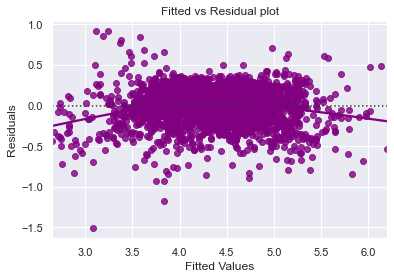

<IPython.core.display.Javascript object>

In [60]:
#plotting the residual plot with the actual, fitted and residual values
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Observations:

In the above plot, i do not see any pattern.It looks random, therefore the assumptions of linearity and independence are satisfied.

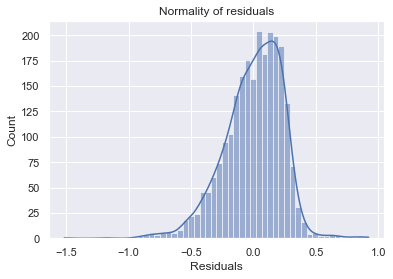

<IPython.core.display.Javascript object>

In [61]:
#The next assumption we will check for is normality. we can check for normality by plotting a histogram of the residuals, q-q plot and shapiro wilks test.
#Checking for normality by plotting a histogram of the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()


### Observations:
the histogram of the residuals have a bell shape.

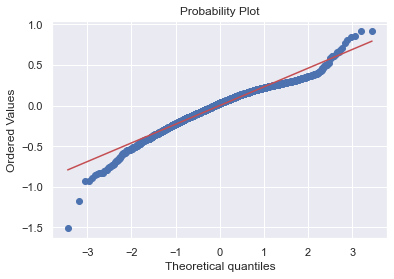

<IPython.core.display.Javascript object>

In [62]:
#Checking for normality using the qq plot:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [63]:
#checking for normality using Shapiro Wilk's test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

<IPython.core.display.Javascript object>

### Observations:

1. from the qq plot, we can see that most of the residuals more or less follow a straight line except for some at the beginning and at the end
2. The shapiro test results show a very low p value, meaning that the residuals are not normal However, as a consideration which is based on the distribution and qq plot, we can say it is a good approximation of the normal distribution.

####  The next assumption we will test for is Homoscedasticity
I will use The goldfeldquandt test to check for Homoscedasticity.
first, we will need to define the null and alternative hypothesis.

Stating the Null and alternative hypothesis for the Goldfeldquandt test:

**Null hypothesis: Residuals are homoscedastic**

**Alternate hypothesis: Residuals have heteroscedasticity**

In [64]:
#Checking for homoscedasticity with the goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106763), ('p-value', 0.4401970650667071)]

<IPython.core.display.Javascript object>

### Observation: 
Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Now that we have tested all the assumptions on our model, we can now build the final model.

## Final Model

In [65]:
#Building the final model:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:26:04   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [66]:
#Checking the parameters and their coefficients which would make up the equation of linear regression:
olsmodel_final.params

const                   1.529151
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_to_date          -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

<IPython.core.display.Javascript object>

In [67]:
#writing the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train3.columns[i], ")")

normalized_used_price = 1.5291510088688047 + 0.02096722879075272 * ( main_camera_mp ) +  0.013827288876828943 * ( selfie_camera_mp ) +  0.02071270165714656 * ( ram ) +  0.0016616476692228222 * ( weight ) +  0.4414723002236374 * ( normalized_new_price ) +  -0.02916976367153936 * ( years_to_date ) +  0.11559844506476258 * ( brand_name_Karbonn ) +  -0.037423299340728355 * ( brand_name_Samsung ) +  -0.0669928513011166 * ( brand_name_Sony ) +  0.08006840695804407 * ( brand_name_Xiaomi ) +  -0.12757512561898043 * ( os_Others ) +  -0.09000552317648913 * ( os_iOS ) +  0.05021345152978331 * ( 4g_yes ) +  -0.06725868426972226 * ( 5g_yes )


<IPython.core.display.Javascript object>

### Interpretation of the Equation for Linear Regression

The constant is 1.529. This means that if all other predictor variables are equal to zero, the normalized used price will be 1.529

A unit increase in main camera MP increases the normalized used price by ~0.021 units, all other variables held constant.

A unit increase in selfie camera MP increases the normalized used price by ~0.013 units, all other variables held constant.

A unit increase in RAM increases the normalized used price by ~0.021 units, all other variables held constant.

A unit increase in weight increases the normalized used price by 0.002 units, all other variables held constant.

A unit increase in normalized new price increases the normalized used price by ~0.442 units, all other variables held constant.

A unit increase in years to date decreases the normalized used price by ~0.029 units, all other variables held constant.

A unit increase in brand name Karbonn increases the normalized used price by ~0.116 units, all other variables held constant.

A unit increase in brand name Samsung decreases the normalized used price by ~0.037 units, all other variables held constant.

A unit increase in brand name Sony decreases the normalized used price by ~0.067 units, all other variables held constant.

A unit increase in brand name Xiaomi increases the normalized used price by ~0.080 units, all other variables held constant.

A unit increase os Others decreases the normalized used price by ~0.128 units, all other variables held constant.

A unit increase in Os_ios decreases the normalized used price by ~0.090 units, all other variables held constant.

A unit increase in 4g_yes increases the normalized used price by ~0.050 units, all other variables held constant.

A unit increase in 5g_yes decreases the normalized used price by ~0.067 units, all other variables held constant.

In [68]:
#We can use the above model to make predictions on the data
#Checking the model perfomance on the training data:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train3,y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,NaN


<IPython.core.display.Javascript object>

In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test3, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,NaN


<IPython.core.display.Javascript object>

### Observations:

The model is able to explain ~84% of the variation in the data

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

The rsquared and adjusted rsquared is comparable between the test set and in the training set, hence we can say that our model performs well on both our training and testing data and is not underfitting

MAE suggests that the model can predict normalized used price within a mean error of ~0.19 on the test data

We can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- These variables correlate with the normalized used price positively: screen_size, main_camera_mp, Selfie_camera_mp, weight, ram, normalized new price, brand name_Karbonn, brand_name Xiaomi and 4g_yes.

- These variables correlate with the normalized used price negatively: years to date, brand name Samsung, brand name Sony, os others, os Ios and 5g_yes.

- The variable that has the most significant effect on the normalized used price is the normalized new price. The higher the price of a device when new, the higher the price when used, thus Recell can look to add more devices of this nature in their portal.

- It will be more profitable for Recell to avoid devices with Os in the others category and Ios since these will decrease the used price. Android and Microsoft OS should be prioritized against others.

- Since devices that have higher RAMs will increase the normalized used price, brand names like Oneplus, Oppo , Huawei and Vevo which have higher rams would have increased prices

- Brand names like Samsung and Sony should be avoided as the used price is lower than other brands. Recell should rather go for more of the other brands especially devices from Karbonn and Xiaomi as they have a positive effect on the used device prices.

- devices with larger main and selfie camera mp sell for higher prices than the devices with lower megapixels, so Recell will need to consider this while accepting used devices to sell. customers who love selfies can choose from a range of Huawei, Oppo, Vivo and Xiaomi devices as they have the highest number of options with selfie camera mp.

- Recell can avoid 5g enabled devices since they decrease the used prices. 4g enabled devices will be more profitable

- Devices that weigh more are sold for higher prices, and we can see from the visualization that battery size and possibly screensize affects the weight of devices. Recell can choose devices that weigh more than those that weigh less. some of the brands in this category are Google, HTC and Lenovo

- Recell can run a promotion to phase out all devices in their stock with longer years to date so that they can focus more on the recent devices. This is because phones with less years to date (phones released more recently) are preferrable since the longer the phone has been released, the lower the used price.

- The most profitable devices at Recell will be the 4g enabled devices manufactured more recently which have higher selfie and main camera mega pixels, ram and weight. I will recommend that Recell stocks these devices for sale. Preferably, they should be from Karbonn, xiaomi and other brands except Sony and samsung, and would have either Android or windows operating system.





___